# LSTM model on Temperature Data

2025/01/11 Mooyoung Lee

## Import library

In [9]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import pandas as pd
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rc('legend',**{'fontsize':16})
matplotlib.rcParams.update({'font.size': 14})
matplotlib.rcParams['figure.figsize'] = [25, 6]

In [2]:
import sys
print(f"Python version = {sys.version}")
print(f"tensorflow version = {tf.__version__}")
print(f"pandas version = {pd.__version__}")
print(f"sklearn version = {sklearn.__version__}")

Python version = 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]
tensorflow version = 2.18.0
pandas version = 2.2.3
sklearn version = 1.5.2


## Load data

- locating zip file caused access issues... so the csv file inside the zip file mannually dragged out using Windows GUI
- Jena is a city in Thuringia, Germany

In [3]:
import tensorflow as tf
import pandas as pd

# Load the dataset
data_url = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip'
cache_dir = r'C:\Users\mooyo\Downloads'
path = tf.keras.utils.get_file(origin=data_url, extract=True, cache_dir=cache_dir)
path

'C:\\Users\\mooyo\\Downloads\\datasets\\jena_climate_2009_2016.csv.zip'

In [20]:
df = pd.read_csv(r"C:\mldoc\ml\reference\OnGoing\data\jena_climate_2009_2016.csv")
df.head(5)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [21]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')

# data review

In [10]:
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


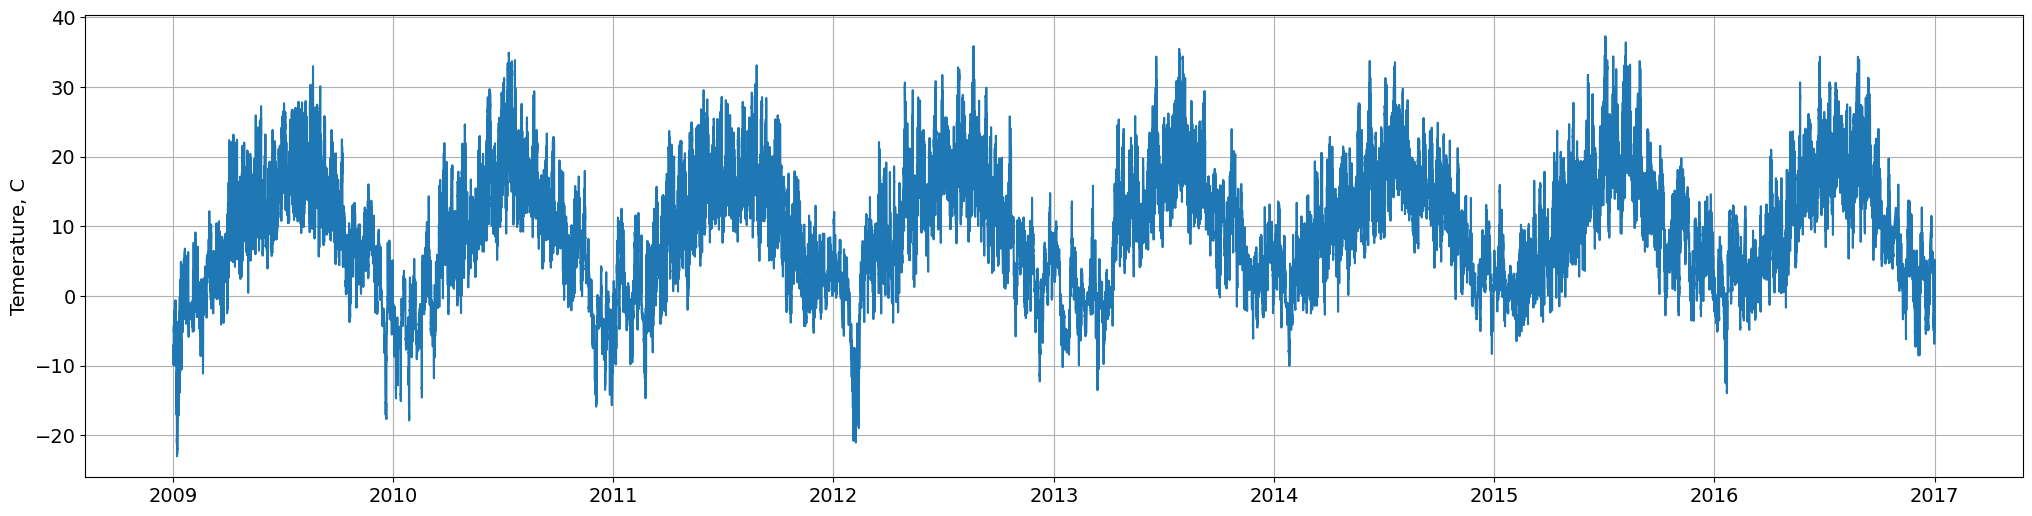

In [15]:
plt.plot(df['T (degC)'])
plt.grid(); plt.ylabel("Temerature, C"); plt.show()

# Transform data

In [22]:
data = df.resample('H')['T (degC)'].first()
data.head()

Date Time
2009-01-01 00:00:00   -8.02
2009-01-01 01:00:00   -8.05
2009-01-01 02:00:00   -8.88
2009-01-01 03:00:00   -8.81
2009-01-01 04:00:00   -9.05
Freq: h, Name: T (degC), dtype: float64

# LSTM

In [23]:
# We'll use 'T (degC)' for temperature forecasting
temperature_data = data.values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
temperature_data_normalized = scaler.fit_transform(temperature_data.reshape(-1, 1))

# Function to create sequences for time series prediction
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Set sequence length (context length in TimesFM terms)
seq_length = 24  # 24 hours of historical data to predict the next hour

# Create sequences
X, y = create_sequences(temperature_data_normalized, seq_length)

# Reshape input data to be [samples, time steps, features] for LSTM or similar models
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the model - Here we'll use an LSTM, which is somewhat analogous to TimesFM in function if not in exact structure
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(seq_length, 1), return_sequences=True),
    tf.keras.layers.LSTM(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32, verbose=1)

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on test set: {mse}')

# Make predictions
predictions = model.predict(X_test)

# Inverse transform predictions to original scale
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Here you would typically plot or analyze your predictions vs. actual values

Epoch 1/50
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0138 - val_loss: nan
Epoch 2/50
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 3.7405e-04 - val_loss: nan
Epoch 3/50
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 2.3460e-04 - val_loss: nan
Epoch 4/50
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 2.0414e-04 - val_loss: nan
Epoch 5/50
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 1.9519e-04 - val_loss: nan
Epoch 6/50
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 1.9846e-04 - val_loss: nan
Epoch 7/50
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 1.8331e-04 - val_loss: nan
Epoch 8/50
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 1.8339e-04 - val_loss: nan
Epoch 9/50
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 1.8030e-04 - val_loss: nan
Epoch 10/50
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 1.8192e-04 - val_loss: nan
Epoch 11/50
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 1.7863e-04 - val_loss: nan
Epoch 12/50
1403

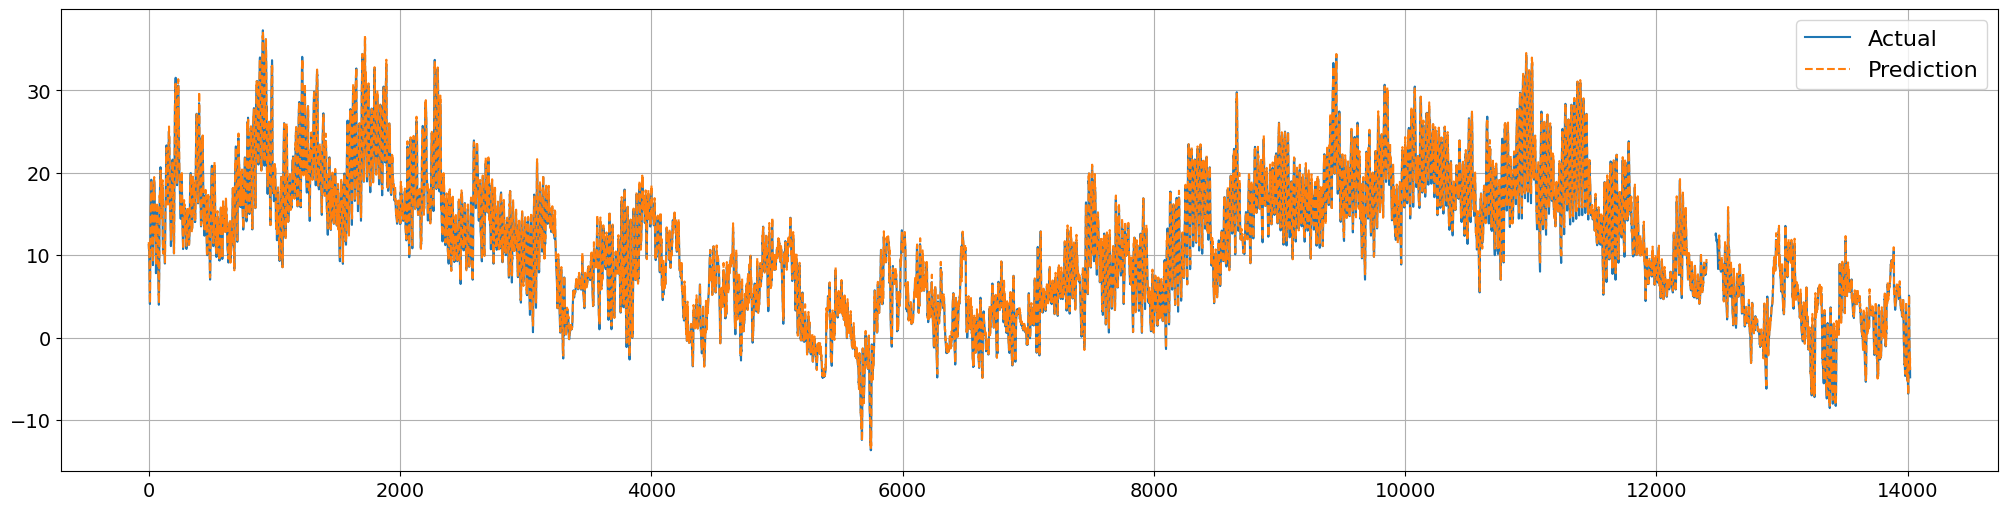

In [26]:
plt.plot(y_test)
plt.plot(predictions, '--')
plt.grid(); plt.legend(["Actual", "Prediction"]); plt.show()

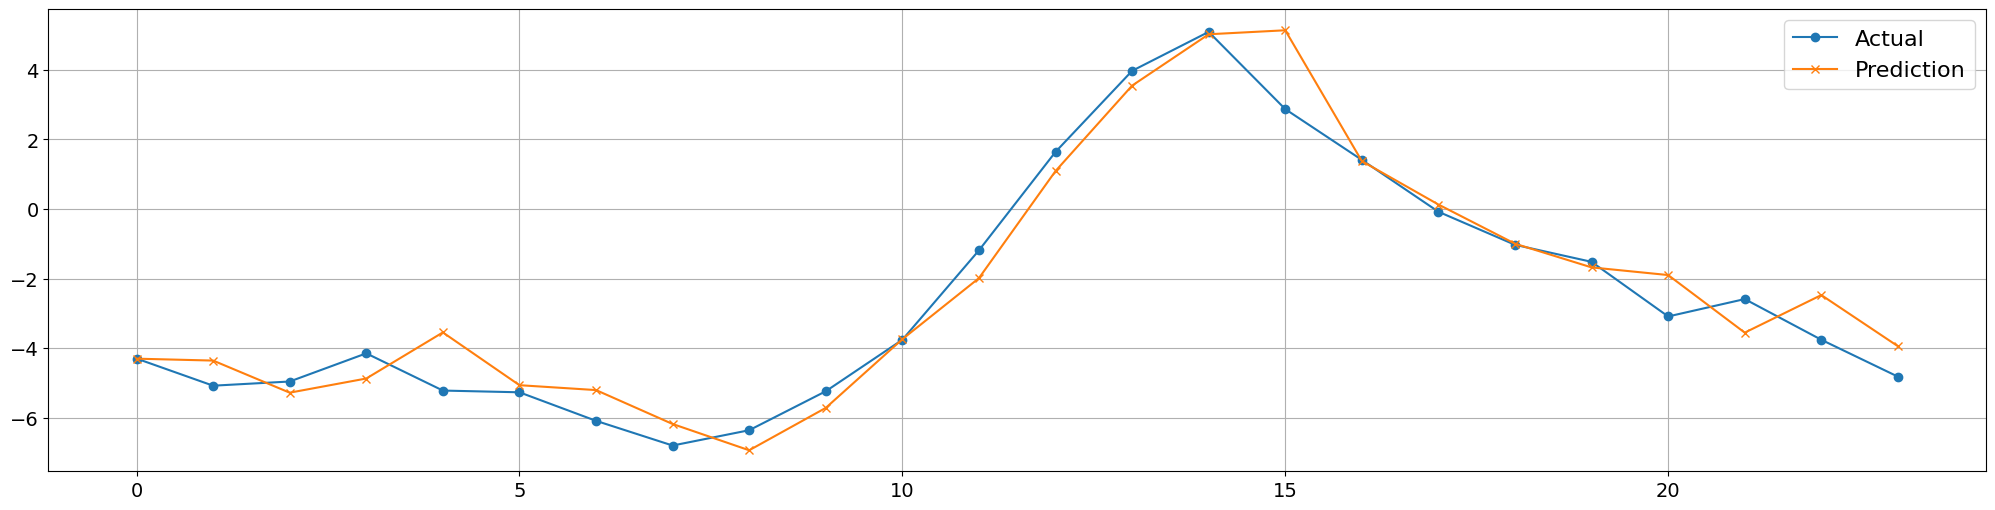

In [30]:
plt.plot(y_test[-24:], "-o")
plt.plot(predictions[-24:], '-x')
plt.grid(); plt.legend(["Actual", "Prediction"]); plt.show()